In [1]:
import os
import pandas as pd
import shutil
from concurrent.futures import ThreadPoolExecutor, as_completed

# Define the directories and output path
directory = r'D:\SamsungSTF\Processed_Data\TripByTrip'
output_path = r'C:\Users\BSL\Desktop\result_files_acc.csv'

# Function to check if a file contains acceleration values >= 
def check_file(filepath):
    try:
        df = pd.read_csv(filepath)
        if 'acceleration' in df.columns:
            if (df['acceleration'].abs() >= 6).any():
                return os.path.basename(filepath)
    except Exception as e:
        print(f"Error processing file {filepath}: {e}")
    return None

def main():
    # Get list of all CSV files in the directory
    csv_files = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith(".csv")]

    files_with_high_acceleration = []

    # Create a ThreadPoolExecutor
    with ThreadPoolExecutor() as executor:
        # Map the check_file function to the file paths
        futures = {executor.submit(check_file, filepath): filepath for filepath in csv_files}

        for future in as_completed(futures):
            result = future.result()
            if result:
                files_with_high_acceleration.append(result)

    # Sort the results
    files_with_high_acceleration.sort()

    # Save results to a CSV file
    result_df = pd.DataFrame(files_with_high_acceleration, columns=['filename'])
    result_df.to_csv(output_path, index=False)

    return files_with_high_acceleration

if __name__ == "__main__":
    result_files = main()
    print(result_files)


['bms_01241228003-2023-08-trip-12.csv', 'bms_01241228003-2023-09-trip-36.csv', 'bms_01241228005-2023-10-trip-5.csv', 'bms_01241228009-2023-03-trip-39.csv', 'bms_01241228009-2023-06-trip-31.csv', 'bms_01241228009-2023-11-trip-38.csv', 'bms_01241228014-2023-01-trip-41.csv', 'bms_01241228024-2023-03-trip-61.csv', 'bms_01241228024-2023-04-trip-46.csv', 'bms_01241228024-2023-05-trip-35.csv', 'bms_01241228024-2023-07-trip-36.csv', 'bms_01241228024-2023-11-trip-80.csv', 'bms_01241228024-2023-11-trip-84.csv', 'bms_01241228024-2023-11-trip-98.csv', 'bms_01241228025-2023-12-trip-29.csv', 'bms_01241228025-2023-12-trip-66.csv', 'bms_01241228025-2023-12-trip-8.csv', 'bms_01241228026-2023-01-trip-113.csv', 'bms_01241228026-2023-05-trip-26.csv', 'bms_01241228030-2023-07-trip-20.csv', 'bms_01241228047-2023-10-trip-12.csv', 'bms_01241228049-2023-01-trip-1.csv', 'bms_01241228049-2023-10-trip-16.csv', 'bms_01241228051-2023-01-trip-14.csv', 'bms_01241228051-2023-01-trip-32.csv', 'bms_01241228051-2023-01-t

  0%|          | 0/10 [00:00<?, ?it/s]

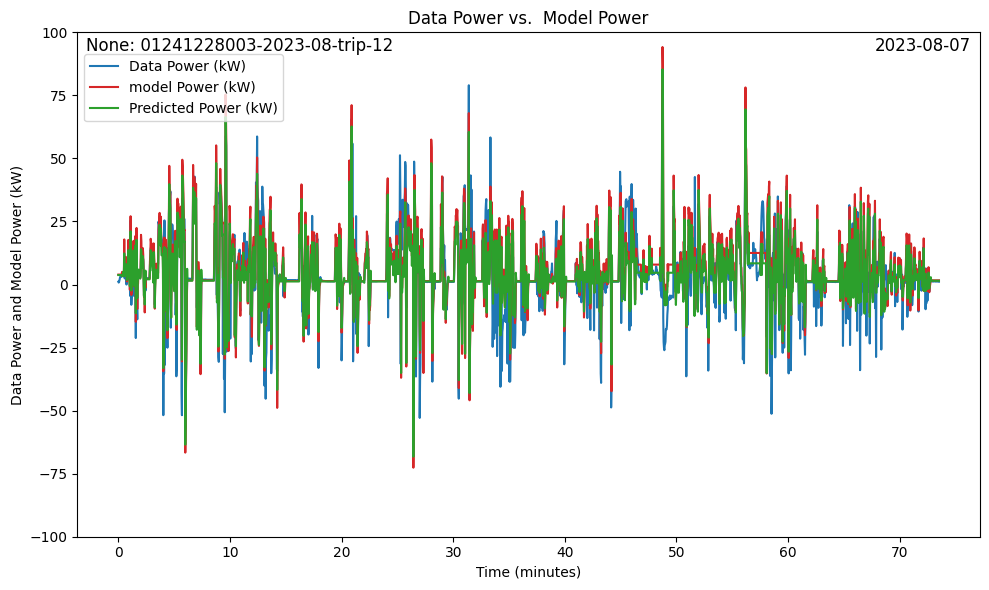

 10%|█         | 1/10 [00:00<00:00,  9.29it/s]

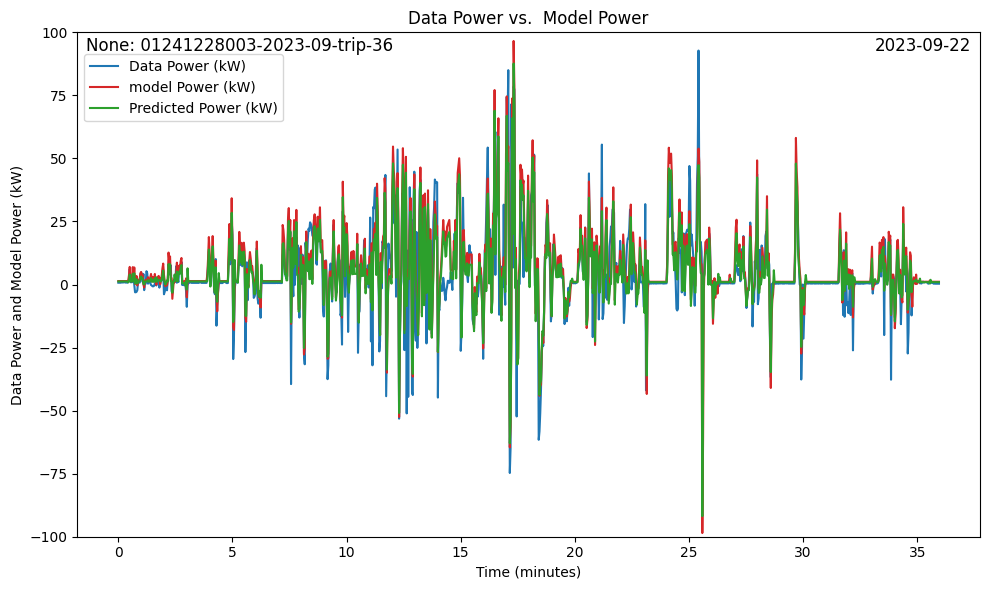

 20%|██        | 2/10 [00:00<00:00,  9.66it/s]

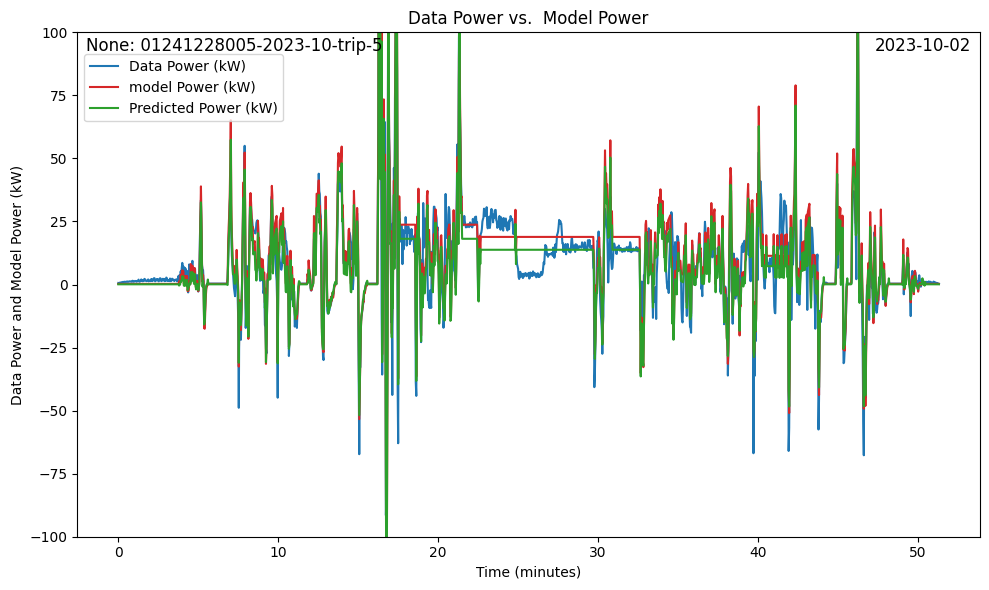

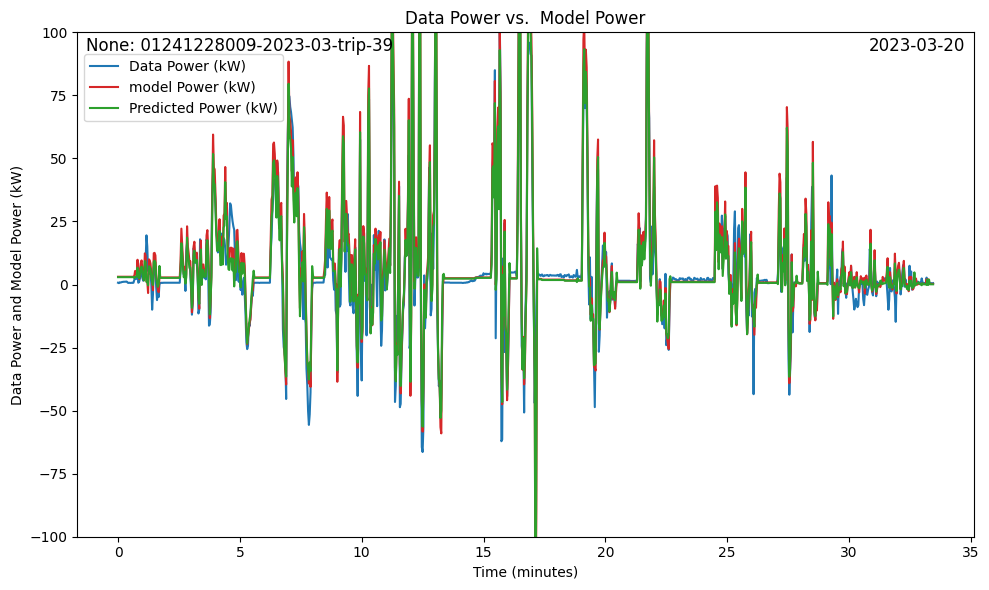

 40%|████      | 4/10 [00:00<00:00,  6.12it/s]

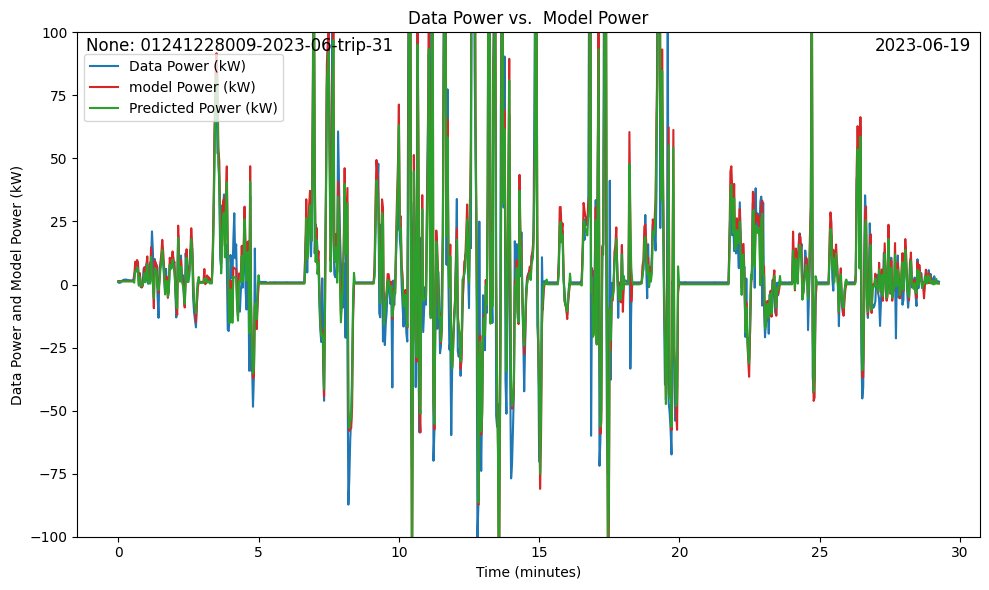

 50%|█████     | 5/10 [00:00<00:00,  6.92it/s]

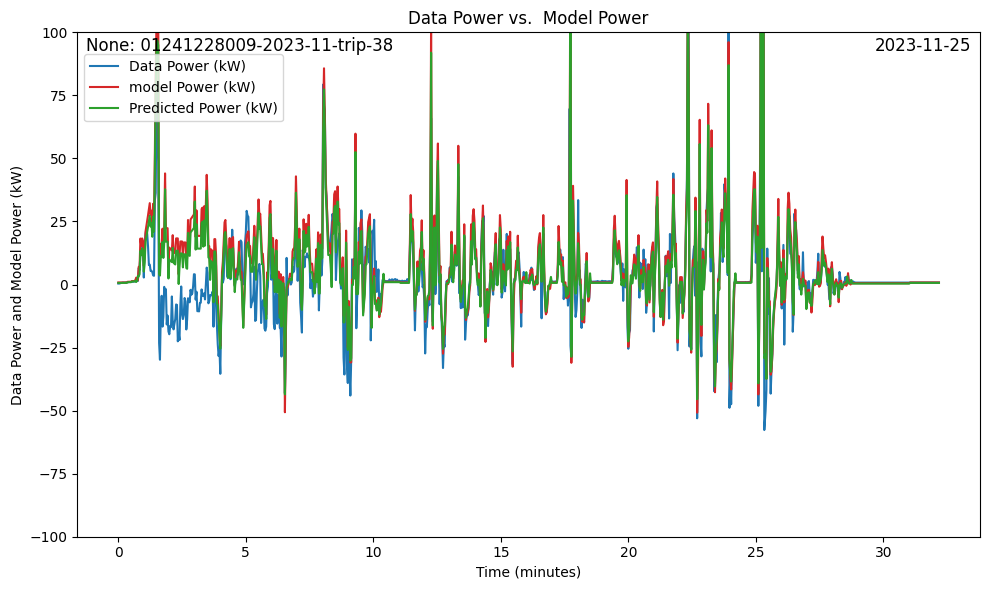

 60%|██████    | 6/10 [00:00<00:00,  7.59it/s]

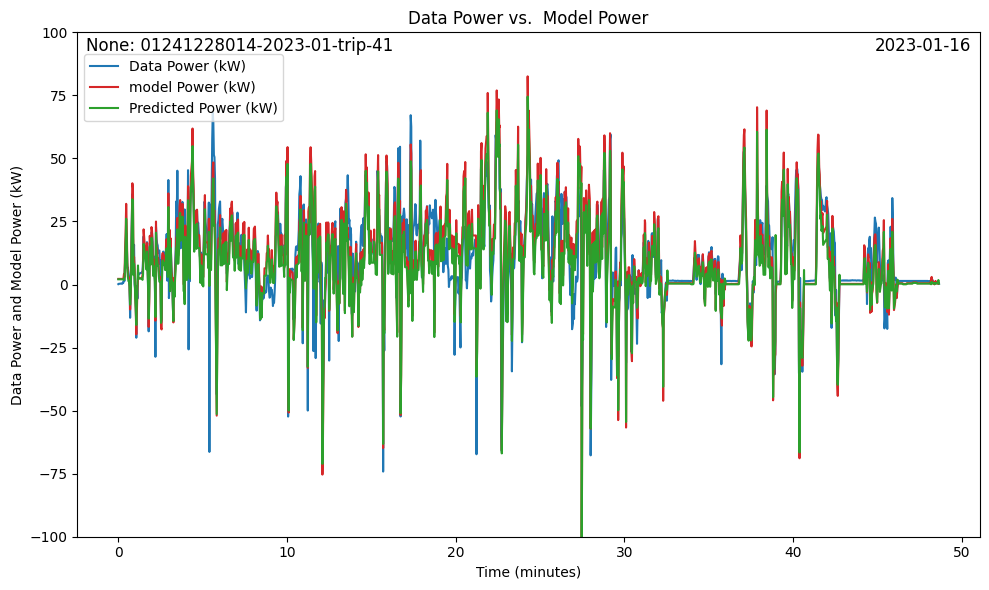

 70%|███████   | 7/10 [00:00<00:00,  8.06it/s]

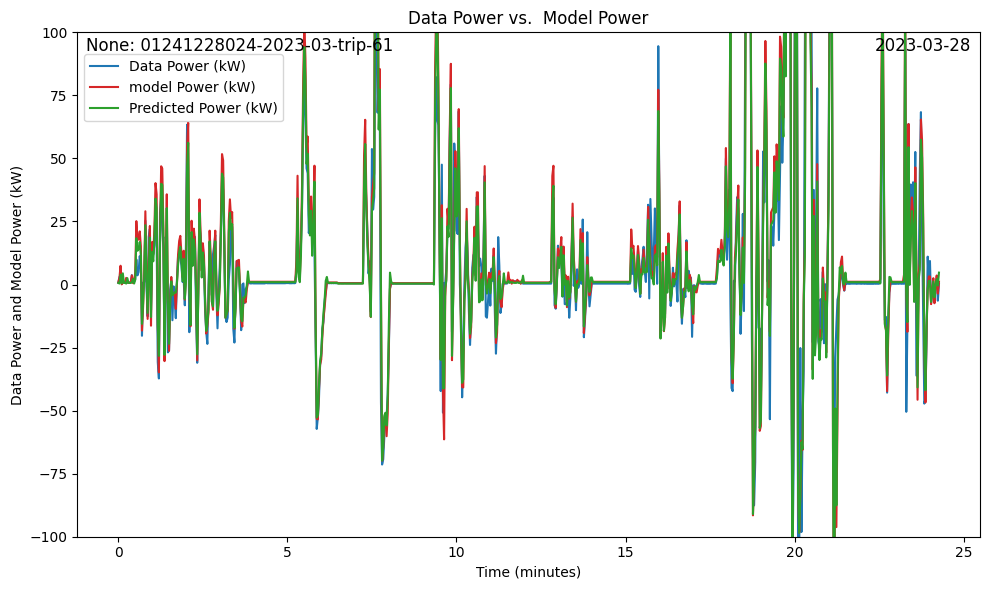

 80%|████████  | 8/10 [00:01<00:00,  8.47it/s]

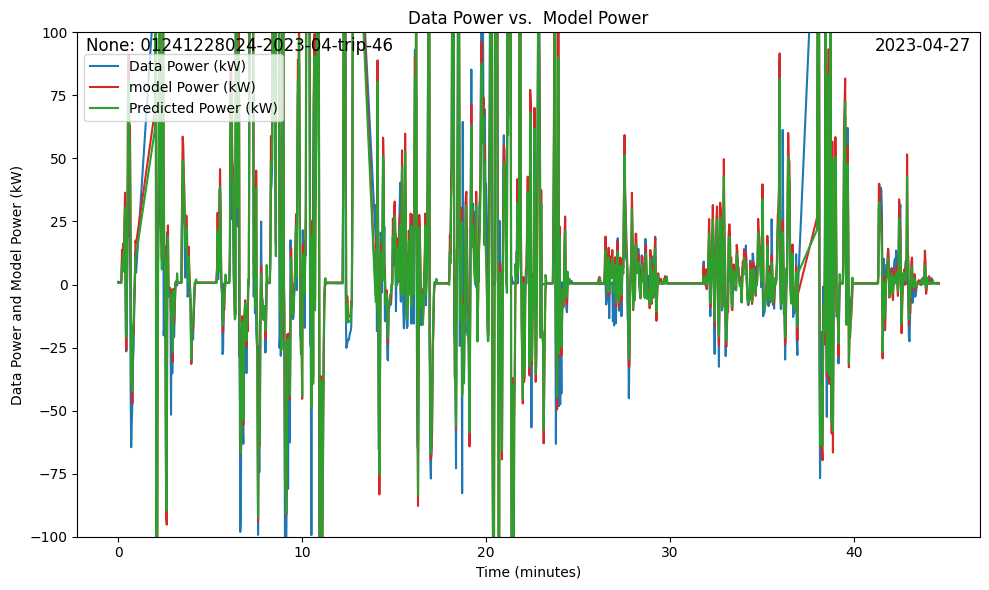

 90%|█████████ | 9/10 [00:01<00:00,  8.66it/s]

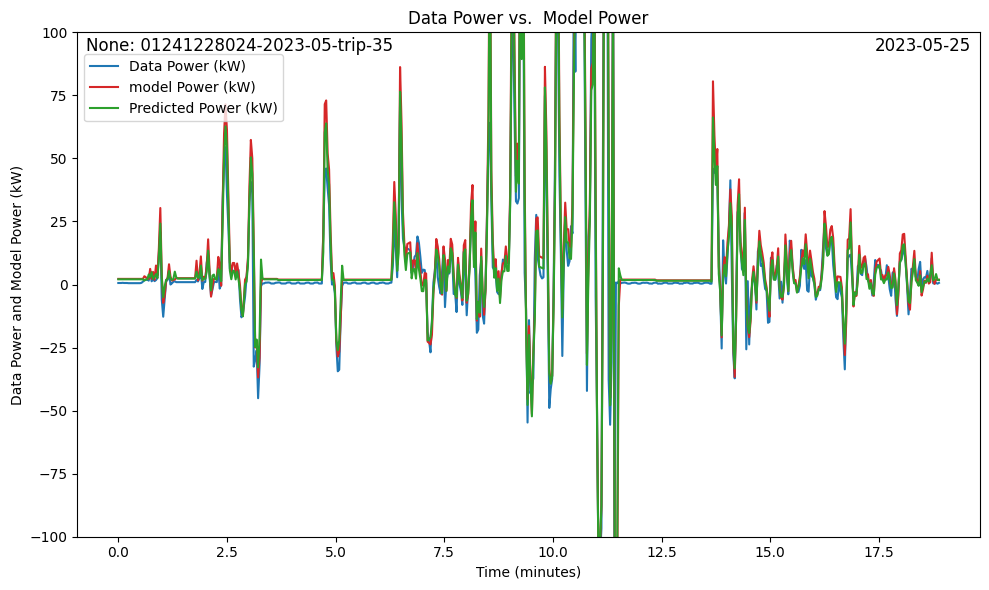

  0%|          | 0/10 [00:00<?, ?it/s]

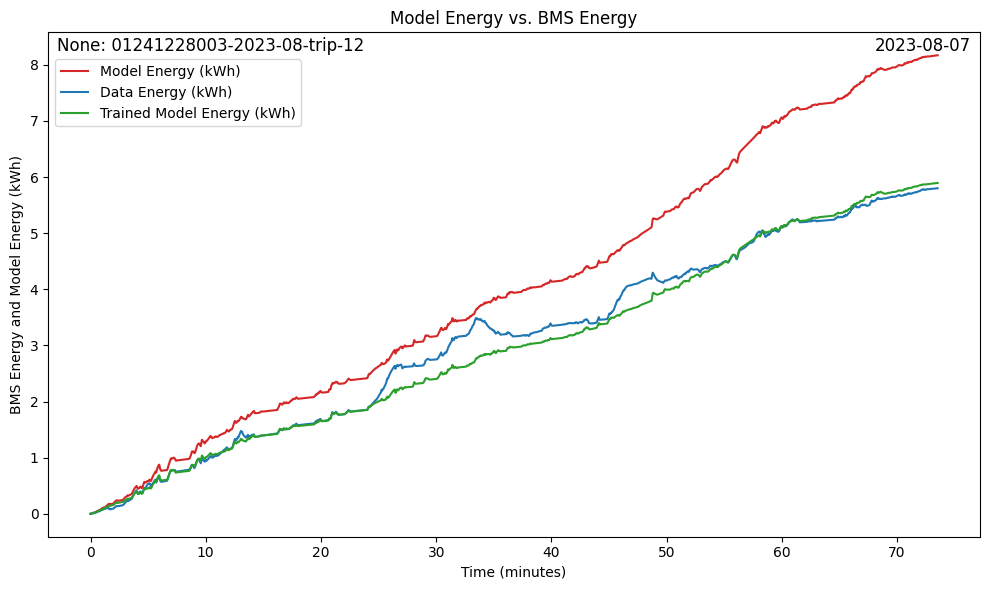

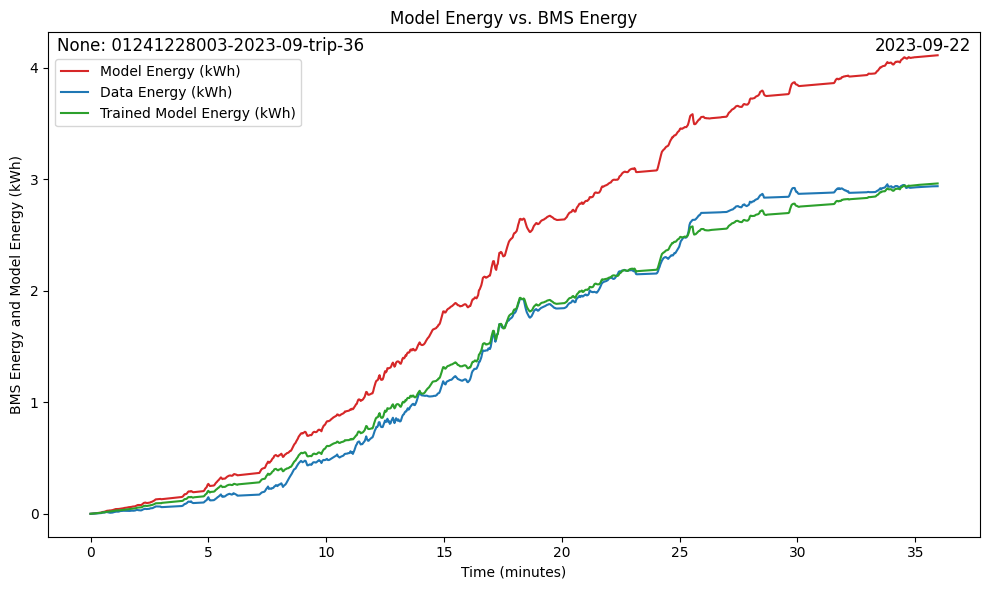

 20%|██        | 2/10 [00:00<00:00, 10.85it/s]

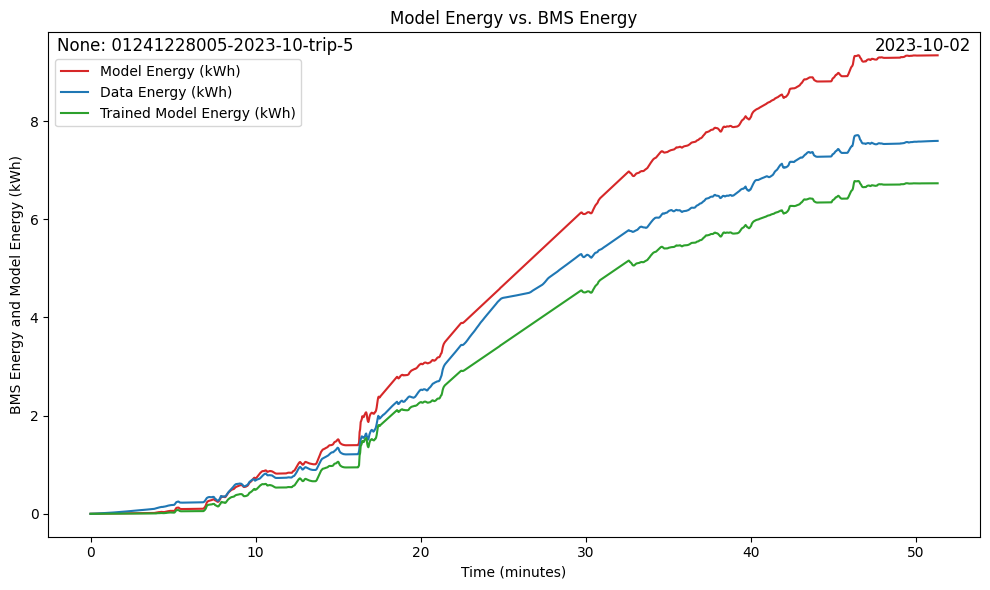

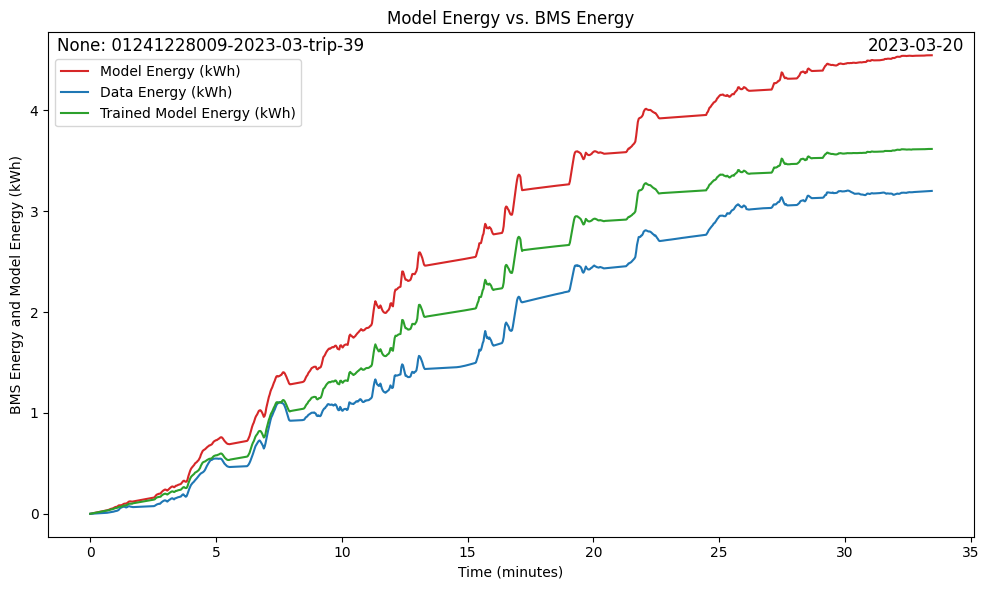

 40%|████      | 4/10 [00:00<00:00, 11.30it/s]

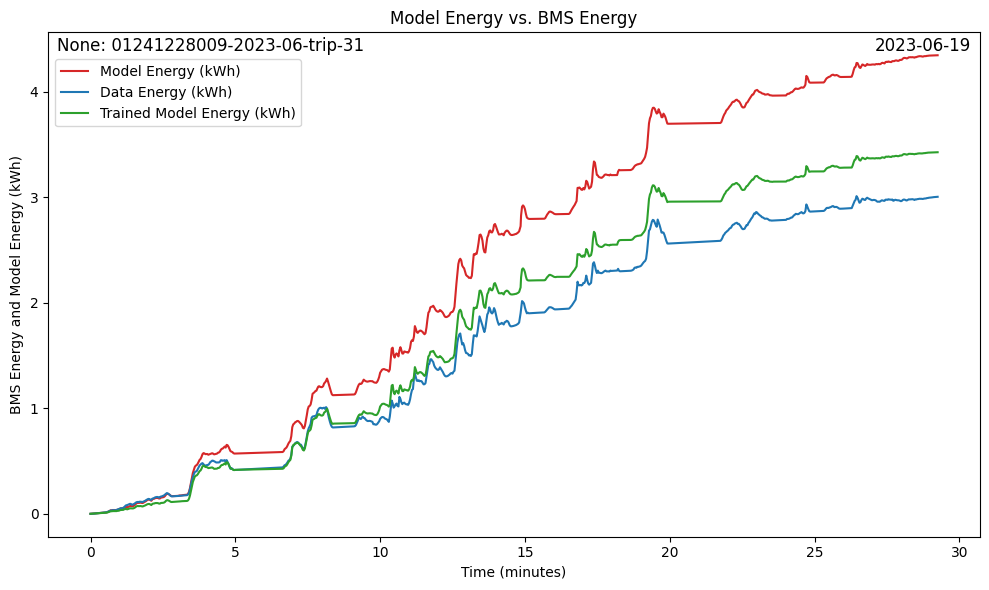

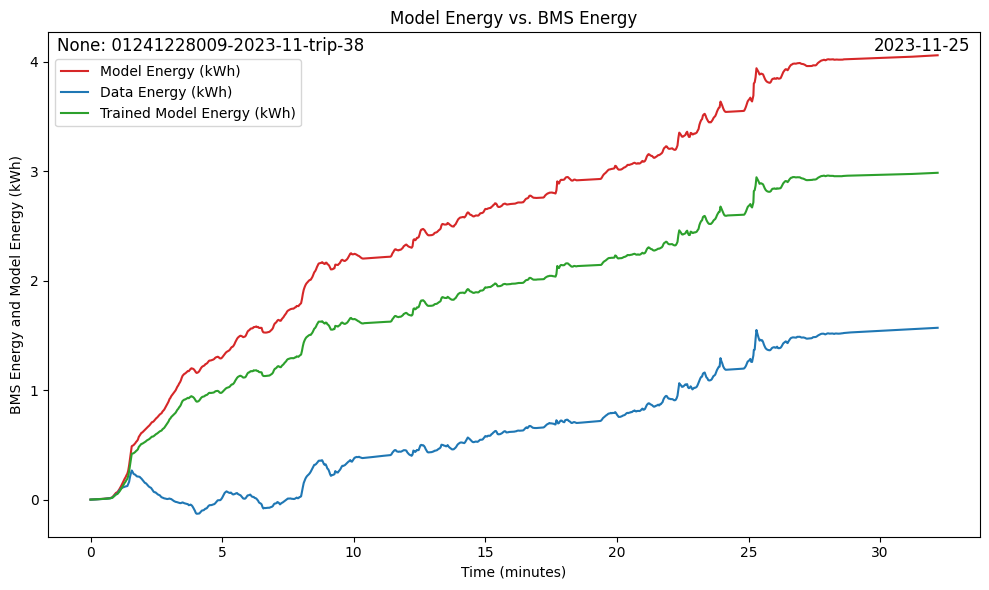

 60%|██████    | 6/10 [00:00<00:00, 11.31it/s]

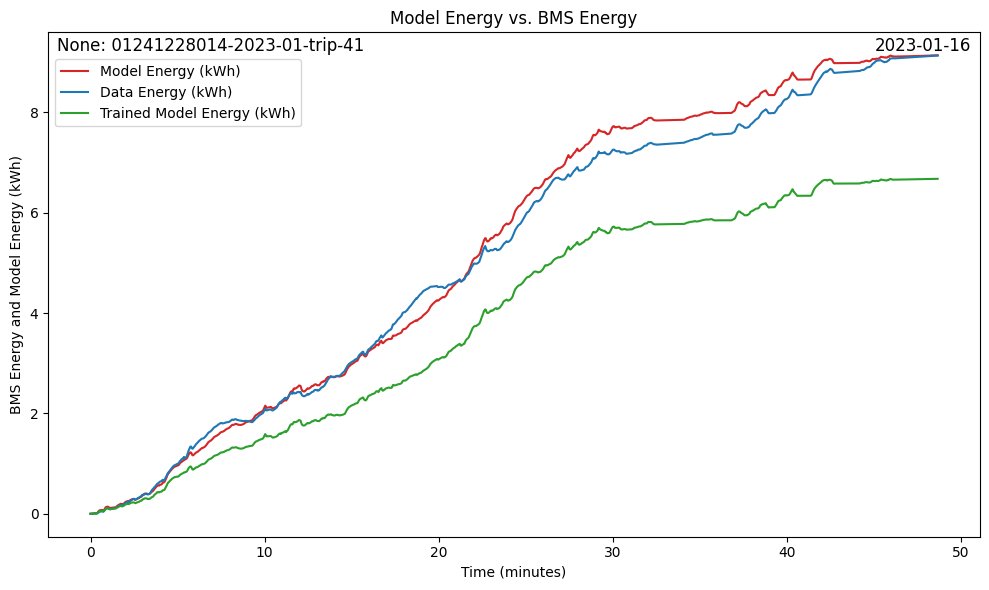

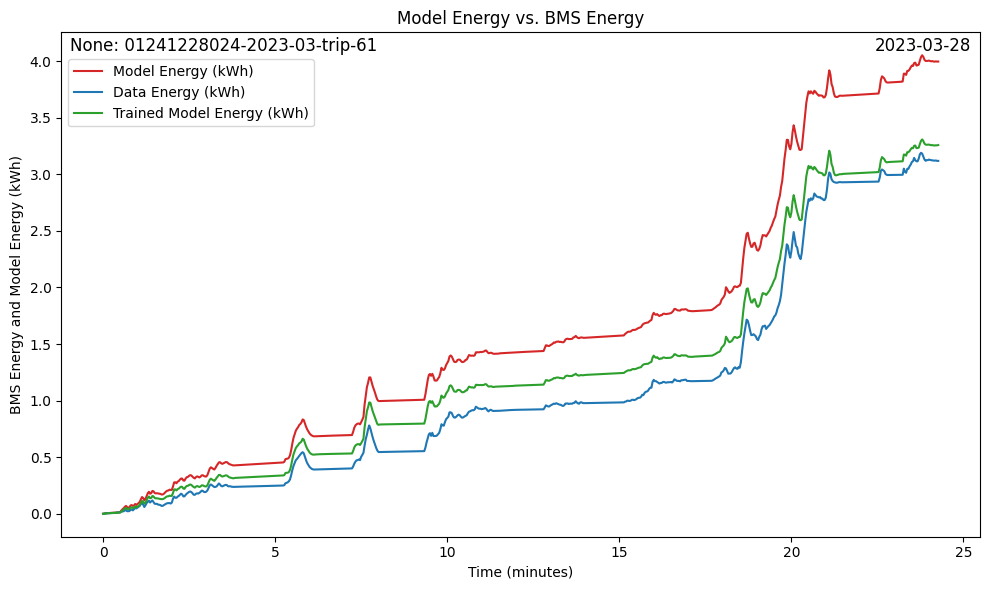

 80%|████████  | 8/10 [00:00<00:00, 11.29it/s]

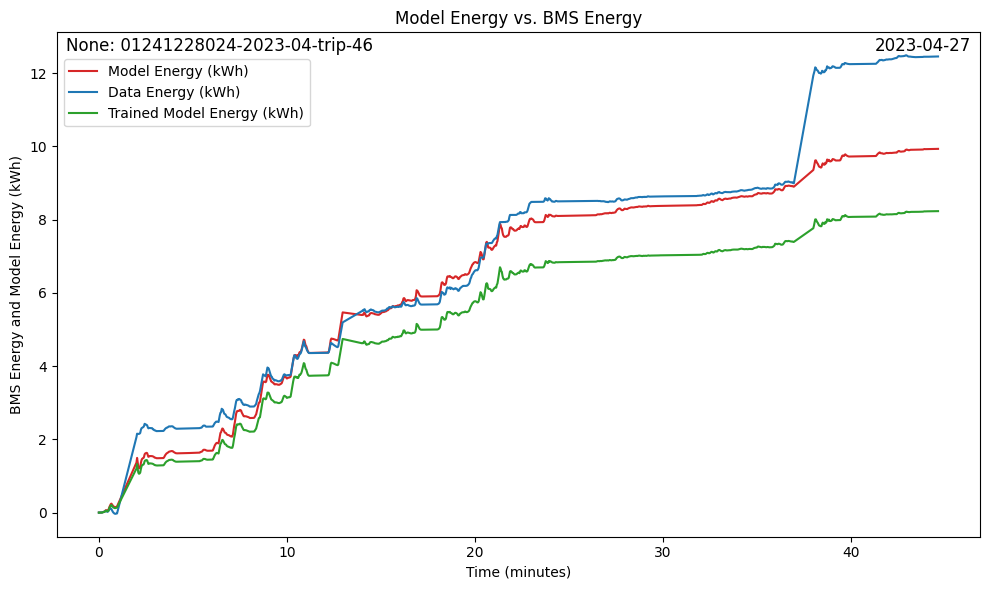

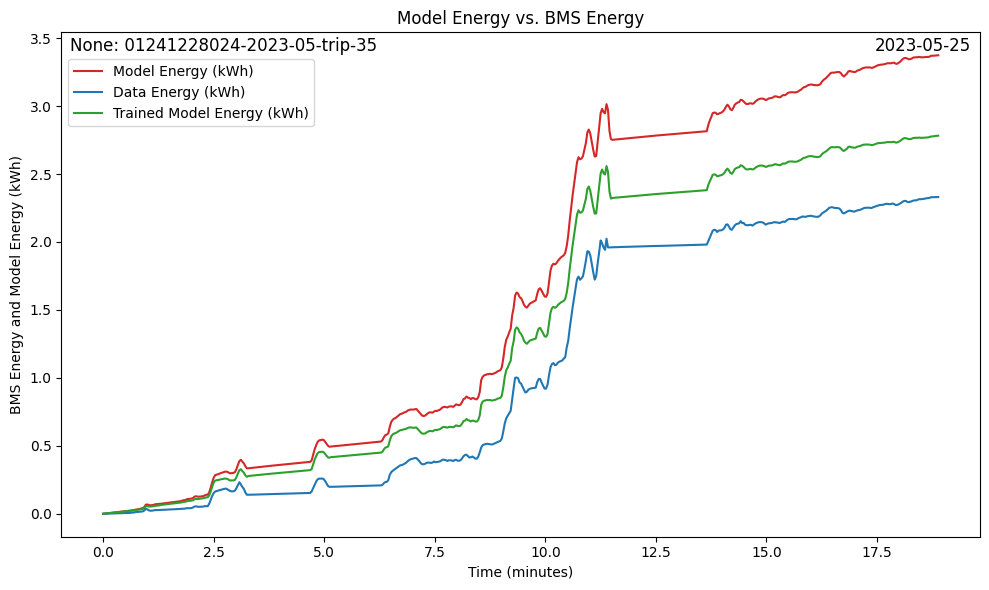

100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


In [8]:
from GS_plot import plot_power, plot_energy
folder_path = os.path.join(os.path.normpath(r'D:\SamsungSTF\Processed_Data'), 'TripByTrip')
# Load the CSV file
file_path = r"C:\Users\BSL\Desktop\result_files_acc.csv"
df = pd.read_csv(file_path)

# Convert the file names to a pandas Series
file_names_series = pd.Series(df.iloc[:, 0])
file_names_series = folder_path + '/' + file_names_series


plot_power(file_names_series[:10], None, 'comparison')
plot_energy(file_names_series[:10], None, 'comparison')
